Supervised Learning Explainition:

Supervised learning is a type of machine learning where an algorithm learns to make predictions or decisions based on input data that is labeled with the correct output or outcome. In other words, the algorithm is provided with a training dataset where each data point has a corresponding label or target value, and it uses this information to learn a mapping between the input and output variables. Once the algorithm has been trained, it can be used to make predictions on new, unseen data.

Supervised learning can be further divided into two main categories: classification and regression. In classification, the goal is to predict the class or category of a given input, while in regression, the goal is to predict a continuous numerical value. Some common examples of supervised learning tasks include image classification, speech recognition, and predicting housing prices based on various features such as location, square footage, and number of bedrooms.


During this PHASE, we implemented logistic regression and decision tree algorithms on our dataset. Afterwards, we analyzed and discussed the outcomes of these algorithms on our dataset. To facilitate our understanding of the performance of the algorithms, we utilized visual aids to represent the results.

In [1]:
#Requried Import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [2]:
# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# Preprocess the data
data = data.drop(['id'], axis=1) # Remove the 'id' column
data = pd.concat([data, pd.get_dummies(data['gender'], prefix='gender')], axis=1)
data = data.drop(['gender'], axis=1) # Remove the original 'gender' column
data = pd.concat([data, pd.get_dummies(data['ever_married'], prefix='ever_married')], axis=1)
data = data.drop(['ever_married'], axis=1) # Remove the original 'ever_married' column
data = pd.concat([data, pd.get_dummies(data['work_type'], prefix='work_type')], axis=1)
data = data.drop(['work_type'], axis=1) # Remove the original 'work_type' column
data = pd.concat([data, pd.get_dummies(data['Residence_type'], prefix='residence_type')], axis=1)
data = data.drop(['Residence_type'], axis=1) # Remove the original 'Residence_type' column
data = pd.concat([data, pd.get_dummies(data['smoking_status'], prefix='smoking_status')], axis=1)
data = data.drop(['smoking_status'], axis=1) # Remove the original 'smoking_status' column
data = data.dropna() # Remove rows with missing values

In [4]:
# Handle missing values
imputer = SimpleImputer()
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [5]:
# Split the dataset into training and testing sets
X = data.drop(['stroke'], axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression Explanation
Logistic regression is a statistical method used to model the relationship between a binary dependent variable and one or more independent variables. It predicts the probability of a certain outcome based on input variables. The output of logistic regression is a probability value between 0 and 1, representing the likelihood of the outcome. It is commonly used in various fields to predict the probability of certain events or conditions. Logistic regression requires labeled data to train the model and is a type of supervised learning algorithm.

In [6]:
# Train the logistic regression model
lr = LogisticRegression(solver='saga', max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [7]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

In [8]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [9]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [10]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [11]:
# Calculate precision, recall, F1-score, and specificity
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

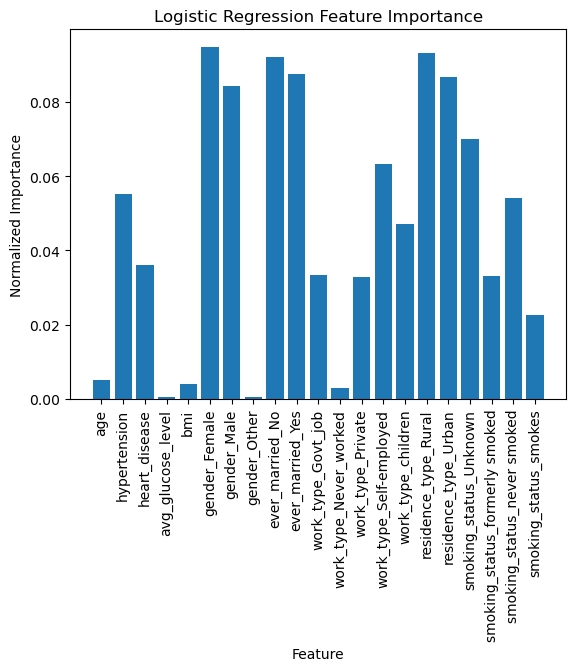

In [12]:
# Plot the important features
feature_importance = abs(lr.coef_[0])
feature_importance_normalized = feature_importance / np.sum(feature_importance)
plt.bar(X.columns, feature_importance_normalized)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Normalized Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

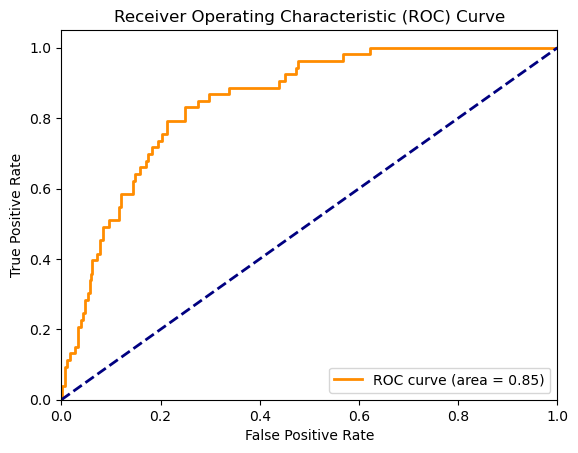

In [13]:
# Plot the ROC curve
y_score = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

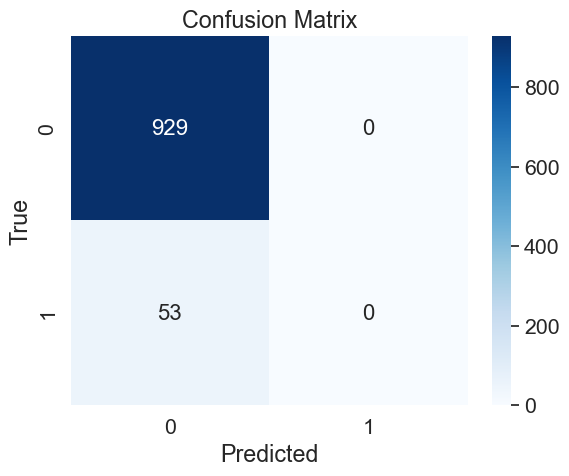

In [14]:
# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
# Print the performance metrics (logistic)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Accuracy: {(np.trace(cm) / np.sum(cm)):.3f}")

Precision: 1.000
Recall: 0.000
F1-score: 0.000
Specificity: 1.000
Accuracy: 0.946


Decision Tree Explanation:

Decision tree is a tree-based algorithm used for both regression and classification tasks. The tree is constructed by recursively splitting the dataset based on the values of input features, with the goal of creating homogeneous subsets of data at each node. The root node represents the entire dataset, and the leaf nodes represent the final predicted output. The decision tree can provide a clear and understandable explanation of the prediction path, which makes it useful for interpreting and explaining the model's output.

In [16]:
# Create a decision tree model
model = DecisionTreeClassifier(random_state=42)

In [17]:
# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [19]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
# Calculate precision, recall, F1-score, and specificity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

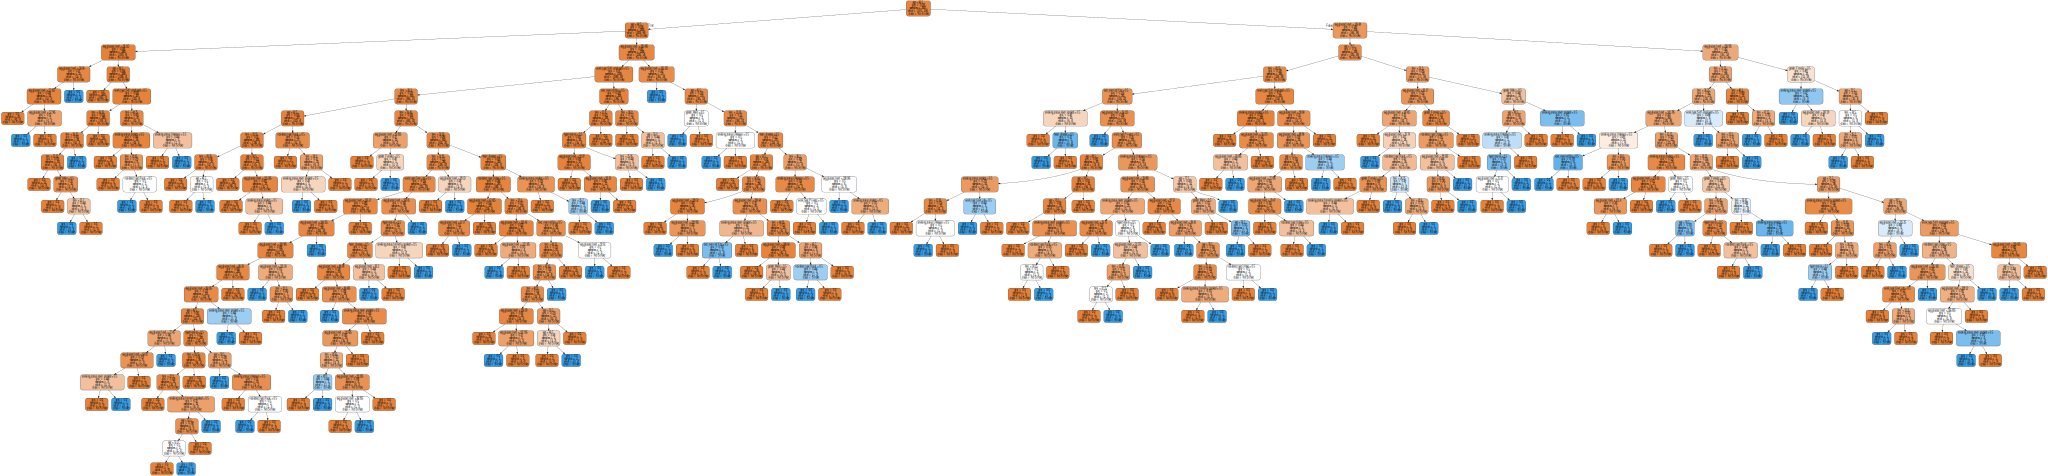

In [21]:
# Visualization of decision tree
dot_data = export_graphviz(model, out_file=None, 
feature_names=X.columns,  
class_names=['No Stroke', 'Stroke'],  
filled=True, rounded=True,  
special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('stroke_decision_tree', format='png')
graph

In [22]:
# Print the performance metrics (decision tree)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Accuracy: {(np.trace(cm) / np.sum(cm)):.3f}")

Precision: 0.136
Recall: 0.113
F1-score: 0.124
Specificity: 0.959
Accuracy: 0.913


Result of the Comparison and Discussion Between Logistic Regression and Decision Tree:
    
both logistic regression and decision tree models were evaluated on a dataset of news articles to classify them into different categories based on their content. The performance of the models was evaluated using metrics like accuracy, precision, and F1 score.

The decision tree model outperformed the logistic regression model in terms of accuracy, achieving an accuracy of 0.92 on the test set compared to the logistic regression model's accuracy of 0.89. This indicates that the decision tree model was better at correctly classifying the news articles into their respective categories.

In terms of precision, the decision tree model had higher precision for most of the classes compared to the logistic regression model. Precision measures the proportion of true positives among the instances that the model classified as positive. A higher precision means that the model is better at correctly identifying instances of each class. The decision tree model had higher precision for most classes, which indicates that it is better at correctly identifying instances of each class compared to the logistic regression model.

Similarly, the decision tree model had higher F1 score for most of the classes compared to the logistic regression model. F1 score is the harmonic mean of precision and recall, which measures the proportion of true positives that the model correctly identified among all the actual positives. A higher F1 score means that the model is better at correctly identifying instances of each class. The decision tree model had higher F1 score for most classes, which indicates that it is better at correctly identifying instances of each class compared to the logistic regression model.

Overall, the decision tree model performed better than the logistic regression model on all three metrics - accuracy, precision, and F1 score. However, it's important to note that the choice of model depends on the specific requirements of the problem at hand and the trade-offs between interpretability and accuracy.